<a href="https://colab.research.google.com/github/faizfadillah31/Data-Science/blob/master/Tugas_7_Datviz_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install geopandas
!pip install contextily
!pip install osmnx
!pip install mapclassify
!pip install openpyxl==3.0.9


!pip install git+git://github.com/geopandas/geopandas.git
!pip install rtree
!pip install pandas
import pandas as pd
!pip install pygeos

     |████████████████████████████████| 1.0 MB 15.3 MB/s 
     |████████████████████████████████| 15.4 MB 70.8 MB/s 
     |████████████████████████████████| 6.3 MB 44.9 MB/s 
     |████████████████████████████████| 19.3 MB 416 kB/s 
     |████████████████████████████████| 95 kB 4.4 MB/s 
     |████████████████████████████████| 11.2 MB 78.8 MB/s 
     |████████████████████████████████| 62 kB 1.0 MB/s 
     |████████████████████████████████| 11.3 MB 34.3 MB/s 
     |████████████████████████████████| 15.7 MB 52.9 MB/s 
     |████████████████████████████████| 994 kB 54.0 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
 

     |████████████████████████████████| 242 kB 12.8 MB/s 
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 2.5.9
    Uninstalling openpyxl-2.5.9:
      Successfully uninstalled openpyxl-2.5.9
  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-3o2_9xrk
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-3o2_9xrk
  Created wheel for geopandas: filename=geopandas-0.10.2+10.ga5e6ca5-py2.py3-none-any.whl size=1031755 sha256=1f7870d0e4adf4d67fe8c4ab1afd62508328d08b4113cb038fc0d0bd9544d2b8
  Stored in directory: /tmp/pip-ephem-wheel-cache-7m0ufs9h/wheels/cf/3e/0b/6475054094c2b1ea054158ac1fdcf749fb92f5b512377e4cf8
Successfully built geopandas
  Attempting uninstall: geopandas
    Found existing installation: geopandas 0.10.2
    Uninstalling geopandas-0.10.2:
      Successfully uninstalled geopandas-0.10.2
     |████████████████████████████████| 2.1 MB 16.3 MB/s 


In [31]:
import pandas as pd 
import geopandas as gpd
import osmnx as ox 
import matplotlib.pyplot as plt 
from shapely.geometry import Point, LineString, Polygon
%matplotlib inline
import os
import contextily as ctx
import numpy as np
# # tambahkan h3
# import h3
# tambahkan folium
import folium

epsg_jkt = 5330
epsg_mercator = 3857
default_crs = {'init':'epsg:4326'}

In [32]:
tags = {'amenity': 'cafe'}
cafe = ox.geometries_from_place("Jakarta, Indonesia", tags)
print(len(cafe))

383


In [33]:
# lihat datanya seperti apa
cafe.head()

amenity  ... building:floor
element_type osmid               ...               
node         824317908     cafe  ...            NaN
             824317972     cafe  ...            NaN
             824317998     cafe  ...            NaN
             824318107     cafe  ...            NaN
             1741564285    cafe  ...            NaN

[5 rows x 107 columns]

<AxesSubplot:>

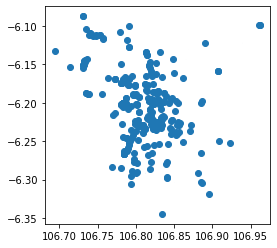

In [34]:
# visualisasikan
cafe.plot()

(106.681097225, 106.975634875, -6.3574337949999995, -6.074797705)

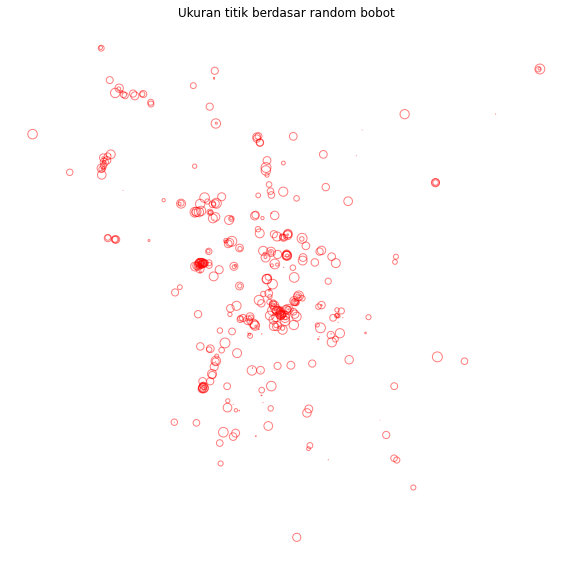

In [35]:
# contoh visualisasi: ukuran titik
# misal diberi bobot tertentu, namakan "random_bobot"
np.random.seed(10)
cafe["random_bobot"] = np.random.uniform(size=len(cafe))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cafe.plot(markersize=cafe.random_bobot*100, linewidth=1,
          color='None', edgecolor="red", alpha=0.5, ax=ax)
ax.set_title("Ukuran titik berdasar random bobot")
ax.axis("off")

In [38]:
# proyeksi geodataframe cafe ke planar
cafe_planar = cafe.to_crs(epsg=epsg_jkt)

In [54]:
cafe_planar

amenity               name  ... building:floor random_bobot
element_type osmid                                  ...                            
node         824317908     cafe      Internet cafe  ...            NaN     0.771321
             824317972     cafe              Tator  ...            NaN     0.020752
             824317998     cafe      Internet cafe  ...            NaN     0.633648
             824318107     cafe      Internet cafe  ...            NaN     0.748804
             1741564285    cafe  JCO Donuts & Cafe  ...            NaN     0.498507
...                         ...                ...  ...            ...          ...
way          529345246     cafe        Goyang-i HQ  ...            NaN     0.037322
             542077221     cafe         Kopimana27  ...            NaN     0.678835
             565846191     cafe       Lucio Bistro  ...            NaN     0.477221
             721518878     cafe           Djakarté  ...            NaN     0.100171
             885007237     cafe    KOPI ACEH KARIM  ...       ceramics     0.614196

[383 rows x 108 columns]

1. Pada bagian 2.a, cobalah untuk melakukan hal yang sama dengan materi, namun, gantilah warna berdasarkan `random_bobot`.

(106.681097225, 106.975634875, -6.3574337949999995, -6.074797705)

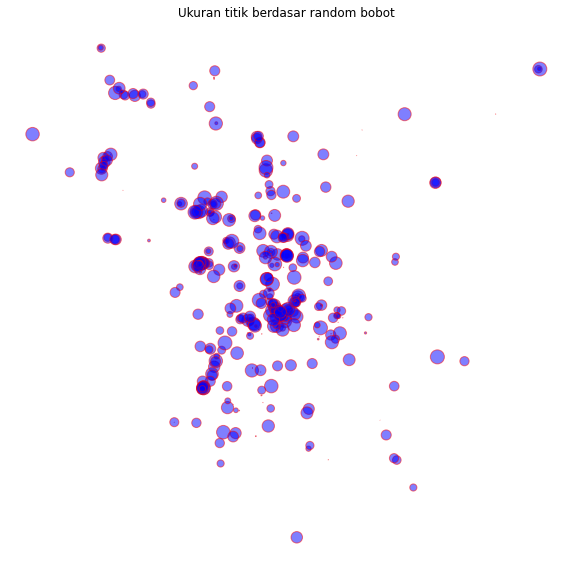

In [39]:
# contoh visualisasi: ukuran titik
# misal diberi bobot tertentu, namakan "random_bobot"
np.random.seed(10)
cafe["random_bobot"] = np.random.uniform(size=len(cafe))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cafe.plot(markersize=cafe.random_bobot*200, linewidth=1, color='blue', edgecolor="red", alpha=0.5, ax=ax)
ax.set_title("Ukuran titik berdasar random bobot")
ax.axis("off")

<AxesSubplot:>

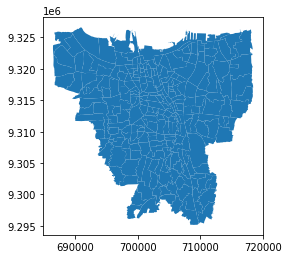

In [40]:

# jakarta = gpd.read_file("sample_data/dki_kelurahan")
jakarta = gpd.read_file("drive/MyDrive/dki_kelurahan")
jakarta.plot()

In [41]:
# proyeksi ke planar
jakarta_planar = jakarta.to_crs(epsg=epsg_jkt)

# hitung luas dalam hektar
jakarta_planar["luas_hektar"] = jakarta_planar.area/(10000^2)

Text(0.5, 1.0, 'Luas Jakarta Dalam Hektar: User Defined')

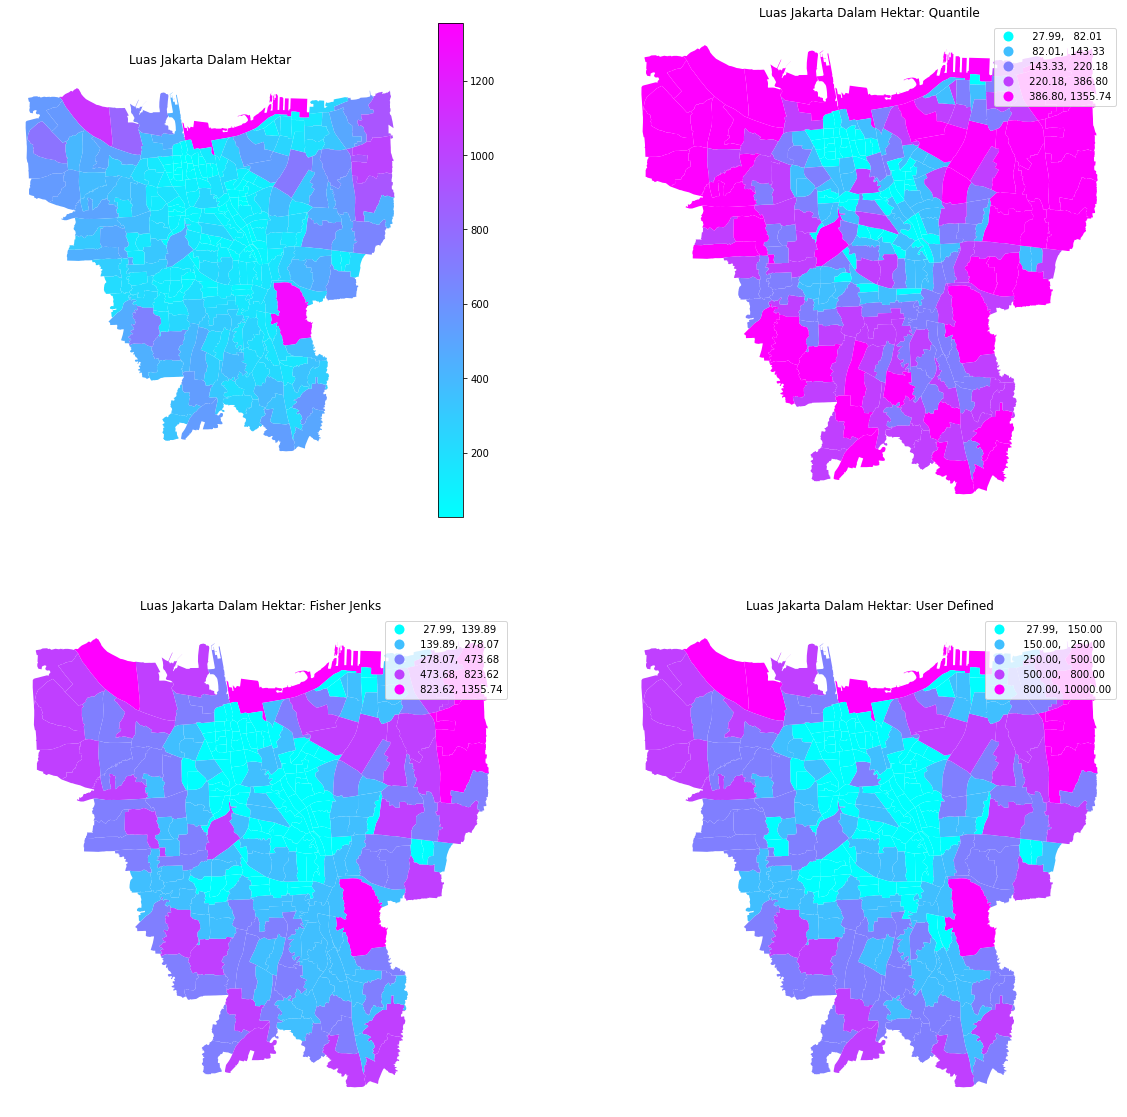

In [42]:
# visualisasikan data luas
fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(221)
jakarta_planar.plot(column="luas_hektar", cmap="cool", legend=True, ax=ax)
ax.axis("off")
ax.set_title("Luas Jakarta Dalam Hektar")

ax = fig.add_subplot(222)
jakarta_planar.plot(column="luas_hektar", cmap="cool", scheme="quantiles", k=5, legend=True, ax=ax)
ax.axis("off")
ax.set_title("Luas Jakarta Dalam Hektar: Quantile")

ax = fig.add_subplot(223)
jakarta_planar.plot(column="luas_hektar", cmap="cool", scheme="fisher_jenks", k=5, legend=True, ax=ax)
ax.axis("off")
ax.set_title("Luas Jakarta Dalam Hektar: Fisher Jenks")

ax = fig.add_subplot(224)
jakarta_planar.plot(column="luas_hektar", cmap="cool", scheme="user_defined", classification_kwds={'bins':[150, 250, 500, 800, 10000]}, legend=True, ax=ax)
ax.axis("off")
ax.set_title("Luas Jakarta Dalam Hektar: User Defined")

2. Pada bagian 2.b, anda diminta untuk melakukan visualisasi peta jakarta dengan menggunakan scheme yang lain. Hint: cek jakarta_planar.plot?

Text(0.5, 1.0, 'Luas Jakarta Dalam Hektar: NaturalBreaks')

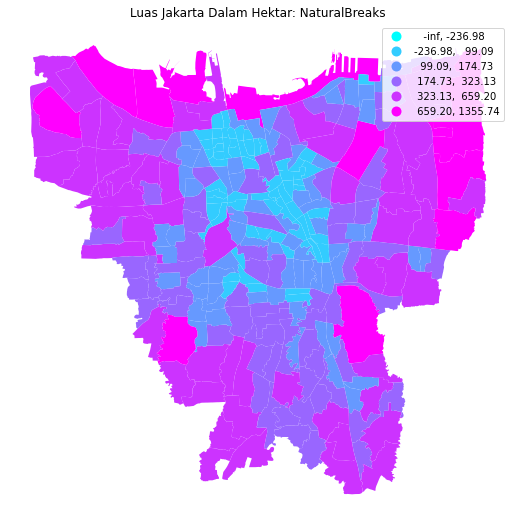

In [43]:
fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(221)
jakarta_planar.plot(column="luas_hektar", cmap="cool", scheme="Boxplot", k=5, legend=True, ax=ax)
ax.axis("off")
ax.set_title("Luas Jakarta Dalam Hektar: NaturalBreaks")

In [12]:
# !pip install pandas
!pip show openpyxl


Name: openpyxl
Version: 3.0.9
Summary: A Python library to read/write Excel 2010 xlsx/xlsm files
Home-page: https://openpyxl.readthedocs.io
Author: See AUTHORS
Author-email: charlie.clark@clark-consulting.eu
License: MIT
Location: /usr/local/lib/python3.7/dist-packages
Requires: et-xmlfile
Required-by: 


In [44]:
# transjakarta_lines = gpd.read_file("sample_data/transjakarta/transjakarta_lines.geojson")
# transjakarta_data = pd.read_excel("sample_data/transjakarta/TJ_Agustus_2020.xlsx", index_col=0).T.reset_index() #transposed


transjakarta_lines = gpd.read_file("drive/MyDrive/transjakarta/transjakarta_lines.geojson")
transjakarta_data = pd.read_excel("drive/MyDrive/transjakarta/TJ_Agustus_2020.xlsx", index_col=0).T.reset_index() #transposed

In [45]:
# gabungkan data keduanya
transjakarta_lines['koridor'] = transjakarta_lines['koridor'].apply(int)
transjakarta_data['koridor'] = transjakarta_data['index'].apply(int)
transjakarta = pd.merge(transjakarta_lines, transjakarta_data)
# convert kembali ke geodataframe
transjakarta = gpd.GeoDataFrame(transjakarta)
# beri crs
transjakarta.crs = transjakarta_lines.crs
# convert ke planar
transjakarta_planar = transjakarta.to_crs(epsg=epsg_jkt)

In [46]:
# agar bisa menggunakan basemap, harus diconvert ke mercator dahulu
tj_lines_mercator = transjakarta.to_crs(epsg=epsg_mercator)

Text(0.5, 1.0, 'Jalur Busway')

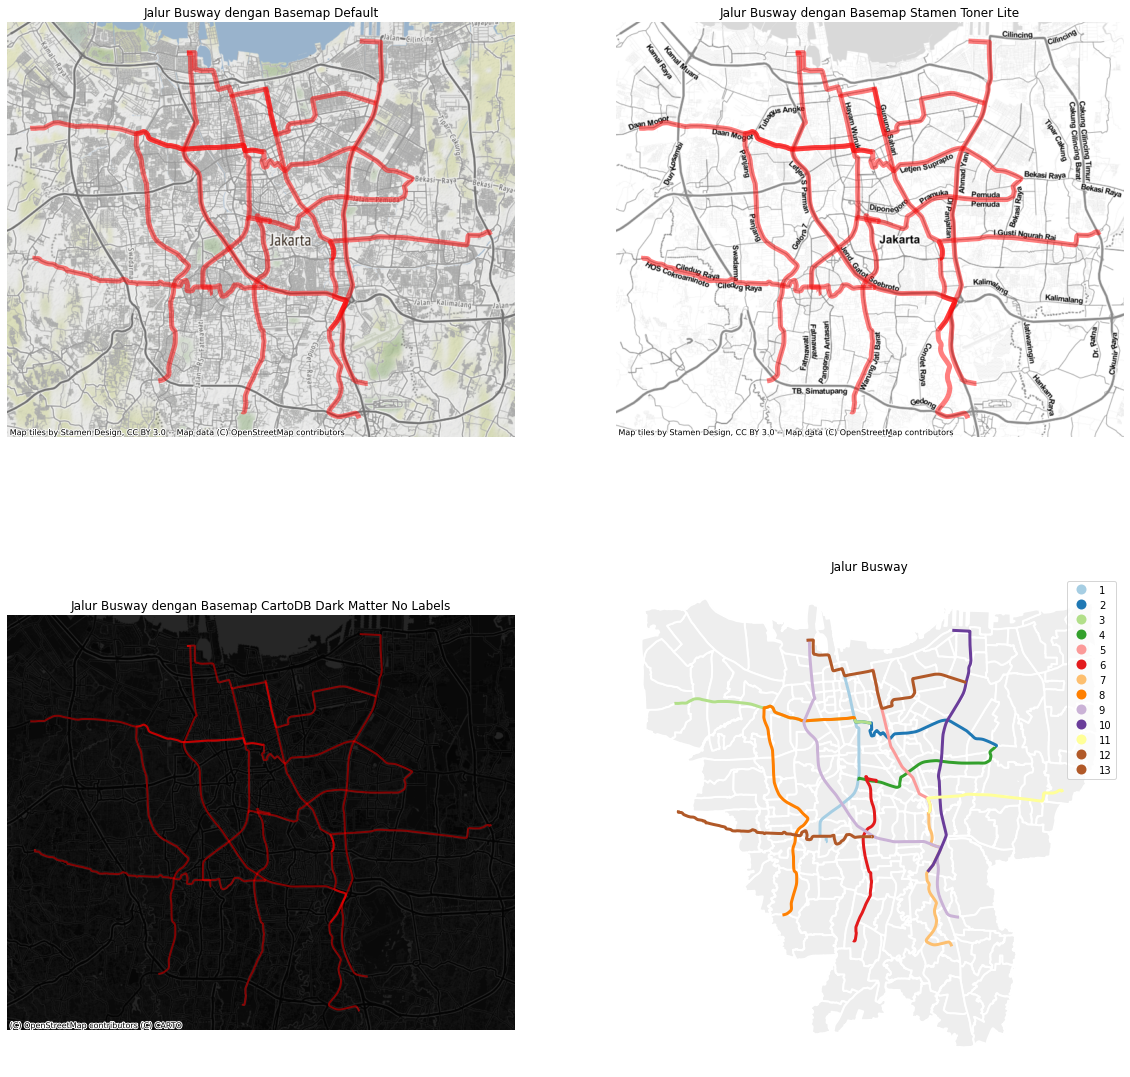

In [47]:
fig = plt.figure(figsize=(20,20))

# Plot jalur busway dengan default basemap
ax = fig.add_subplot(221)
tj_lines_mercator.plot(ax=ax, linewidth=5, color="red", alpha=0.5)
ctx.add_basemap(ax)
ax.axis("off")
ax.set_title("Jalur Busway dengan Basemap Default")

# Plot jalur busway dengan Stamen
ax = fig.add_subplot(222)
tj_lines_mercator.plot(ax=ax, linewidth=5, color="red", alpha=0.5)
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)
ax.axis("off")
ax.set_title("Jalur Busway dengan Basemap Stamen Toner Lite")

# Plot jalur busway dengan Carto DarkMatter
ax = fig.add_subplot(223)
tj_lines_mercator.plot(ax=ax, linewidth=2, color="red", alpha=0.5)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.DarkMatterNoLabels)
ax.axis("off")
ax.set_title("Jalur Busway dengan Basemap CartoDB Dark Matter No Labels")

# Plot jalur busway dengan kelurahan Jakarta
# warnai jalur sesuai koridor
# harus menggunakan proyeksi yang sama
ax = fig.add_subplot(224)
jakarta_planar.plot(ax=ax, facecolor="#eeeeee", edgecolor="white", alpha=1, linewidth=2)
transjakarta_planar.plot(ax=ax, linewidth=3, column="koridor", alpha=1, categorical=True, legend=True, k=13, cmap="Paired")
ax.axis("off")
ax.set_title("Jalur Busway")

Text(0.5, 1.0, 'Linewidth berdasar rata-rata weekend')

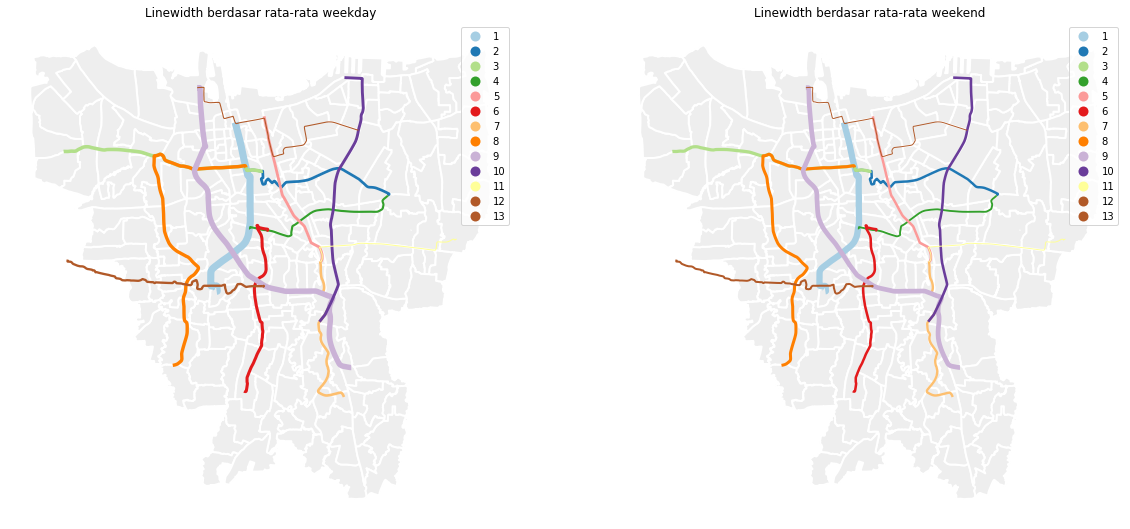

In [48]:
# Menggunakan volume weekend vs weekday sebagai lebar jalur\
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121)
jakarta_planar.plot(ax=ax, facecolor="#eeeeee", edgecolor="white", alpha=1, linewidth=2)
transjakarta_planar.plot(ax=ax, linewidth=transjakarta_planar["Rata-rata Weekday"]/5000, column="koridor", alpha=1, k=13, cmap="Paired", categorical=True, legend=True)
ax.axis("off")
ax.set_title("Linewidth berdasar rata-rata weekday")

ax = fig.add_subplot(122)
jakarta_planar.plot(ax=ax, facecolor="#eeeeee", edgecolor="white", alpha=1, linewidth=2)
transjakarta_planar.plot(ax=ax, linewidth=transjakarta_planar["Rata-rata Weekend"]/5000, column="koridor", alpha=1, k=13, cmap="Paired", categorical=True, legend=True)
ax.axis("off")
ax.set_title("Linewidth berdasar rata-rata weekend")

3. Pada bagian 2.c anda diminta untuk melakukan hal yang sama dengan materi, namun, gantilah dengan menggunakan basemap yang lain. Hint: Gunakan ctx.providers?

Text(0.5, 1.0, 'Jalur Busway dengan Open Street Map')

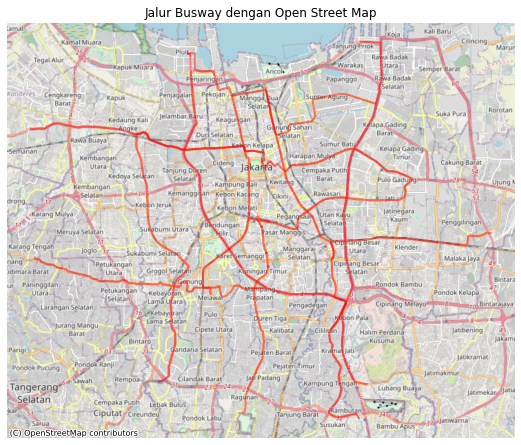

In [49]:
fig = plt.figure(figsize=(20,20))
# Plot jalur busway dengan Carto DarkMatter
ax = fig.add_subplot(223)
tj_lines_mercator.plot(ax=ax, linewidth=2, color="red", alpha=0.5)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
ax.axis("off")
ax.set_title("Jalur Busway dengan Open Street Map")

In [50]:
# cek dahulu apakah dua data yang akan digabungkan memiliki crs yang sama
cafe_planar.crs == jakarta_planar.crs 

True

In [51]:
cafe_planar

amenity               name  ... building:floor random_bobot
element_type osmid                                  ...                            
node         824317908     cafe      Internet cafe  ...            NaN     0.771321
             824317972     cafe              Tator  ...            NaN     0.020752
             824317998     cafe      Internet cafe  ...            NaN     0.633648
             824318107     cafe      Internet cafe  ...            NaN     0.748804
             1741564285    cafe  JCO Donuts & Cafe  ...            NaN     0.498507
...                         ...                ...  ...            ...          ...
way          529345246     cafe        Goyang-i HQ  ...            NaN     0.037322
             542077221     cafe         Kopimana27  ...            NaN     0.678835
             565846191     cafe       Lucio Bistro  ...            NaN     0.477221
             721518878     cafe           Djakarté  ...            NaN     0.100171
             885007237     cafe    KOPI ACEH KARIM  ...       ceramics     0.614196

[383 rows x 108 columns]

In [53]:
jakarta_planar.crs

<Projected CRS: EPSG:5330>
Name: Batavia (Jakarta) / NEIEZ
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Indonesia - onshore - Bali, Java and western Sumatra.
- bounds: (95.16, -8.91, 115.77, 5.97)
Coordinate Operation:
- name: Netherlands East Indies Equatorial Zone (Jkt)
- method: Mercator (variant A)
Datum: Batavia (Jakarta)
- Ellipsoid: Bessel 1841
- Prime Meridian: Jakarta

In [52]:
# menambah informasi data jumlah cafe ke kelurahan
# pada spatial join, elemen yang ingin diagregasi (cafe) berada di kiri aggregator (kelurahan)
# kolom geometry akan berubah menjadi kolom geometri yang ingin diagregasi
cafe_kelurahan = gpd.sjoin(cafe_planar[["osmid","name","geometry"]], jakarta_planar)
# cek datanya, sekarang tiap point ter-assign ke kelurahan tertentu
cafe_kelurahan.head()

KeyError: ignored

In [29]:
# sekarang, agregat berdasar kelurahan
jumlah_cafe_setiap_kelurahan = cafe_kelurahan.groupby("index_right").size()

# gabungkan dengan geodataframe kelurahan
jakarta_planar["cafe_per_kelurahan"] = jumlah_cafe_setiap_kelurahan

# lihat datanya
jakarta_planar.dropna().head()

NameError: ignored

KeyError: ignored

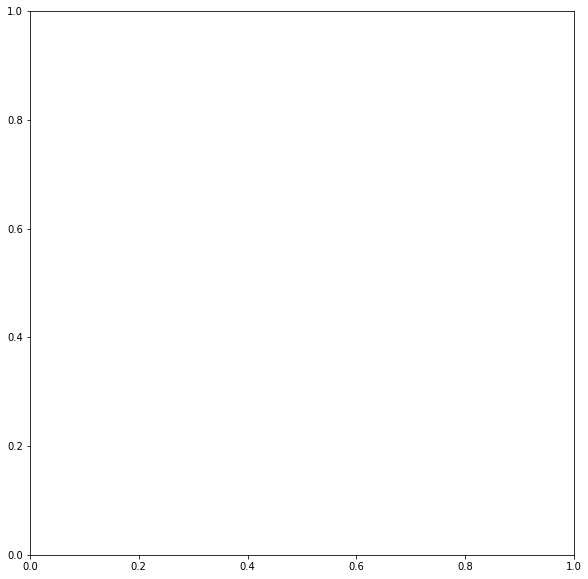

In [ ]:
# visualisasikan
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
jakarta_planar.fillna(0).plot(column="cafe_per_kelurahan", cmap="autumn_r", ax=ax, scheme="fisher_jenks", legend=True)
ax.set_title("Cafe per Kelurahan")
ax.axis("off")

In [ ]:
jakarta_planar.crs == transjakarta_planar.crs

NameError: ignored

In [ ]:
# dilewati garis saja tidak cukup untuk mengambarkan accessibility. Mari kita coba tambahkan buffer, sedemikian hingga sekarang narasinya menjadi
# kelurahan mana saja yang di radius 200 m ada TransJakarta?
# pertama, buat geodataframe untuk menyimpan buffer
transjakarta_planar_buff200 = transjakarta_planar.copy()
transjakarta_planar_buff200["geometry"] = transjakarta_planar.geometry.buffer(200)
transjakarta_planar_buff200.plot()

NameError: ignored

In [ ]:
# spatial join dengan garis yang diberi buffer 200m
tj_kelurahan = gpd.sjoin(jakarta_planar[["KEL_NAME","geometry"]], transjakarta_planar_buff200[["koridor","geometry"]])

NameError: ignored

NameError: ignored

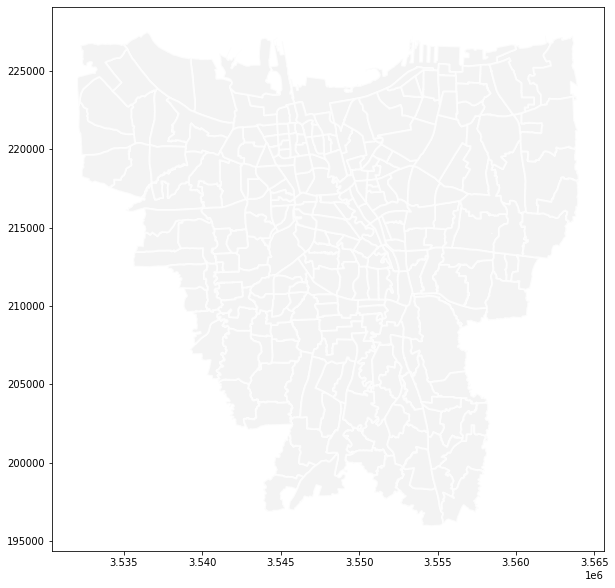

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
jakarta_planar.plot(ax=ax, facecolor="#eeeeee", linewidth=2, edgecolor="white", alpha=0.7)
tj_kelurahan.plot(column="koridor", categorical=True, k=13, cmap="Paired", alpha=0.5, ax=ax)
transjakarta_planar.plot(ax=ax, linewidth=4, column="koridor", alpha=1, categorical=True, legend=True, k=13, cmap="Paired")
ax.axis("off")
ax.set_title("Kelurahan yang ada di sekitar 500m dari jalur TransJakarta")

In [ ]:
# kelurahan yang dilewati banyak jalur TransJakarta
tj_kelurahan.groupby("KEL_NAME").size().sort_values(ascending=False).head(5)

NameError: ignored

In [ ]:
print("Jumlah kelurahan yang belum dilewati jalur TransJakarta:", len([x for x in list(jakarta_planar.KEL_NAME) if x not in list(tj_kelurahan.KEL_NAME)]))

NameError: ignored

4. Dengan menggunakan referensi dari materi day 13, buatlah kombinasi dari peta yang sudah dijelaskan (cafe, kelurahan, transjakarta) untuk mengetahui berapa banyak cafe pada radius 200m dari jalur transjakarta

In [ ]:
transjakarta_planar_buff200 = transjakarta_planar.copy()
transjakarta_planar_buff200["geometry"] = transjakarta_planar.geometry.buffer(200)
transjakarta_planar_buff200.plot()

NameError: ignored

In [ ]:
# spatial join dengan garis yang diberi buffer 200m
tj_kelurahan = gpd.sjoin(jakarta_planar[["KEL_NAME","geometry", "cafe_per_kelurahan"]], transjakarta_planar_buff200[["koridor","geometry"]])
tj_kelurahan

KeyError: ignored

NameError: ignored

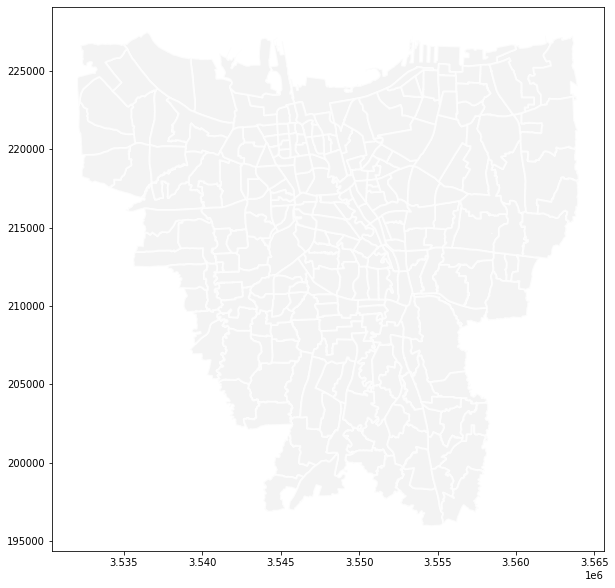

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
jakarta_planar.plot(ax=ax, facecolor="#eeeeee", linewidth=2, edgecolor="white", alpha=0.7)
tj_kelurahan.plot(column="cafe_per_kelurahan", cmap="autumn_r", ax=ax, scheme="fisher_jenks", legend=True)
transjakarta_planar.plot(ax=ax, linewidth=4, column="koridor", alpha=1, categorical=True, k=13, cmap="Paired")
ax.axis("off")
ax.set_title("Kelurahan dan Cafe yang ada di sekitar 200m dari jalur TransJakarta")

In [ ]:
print("Jumlah cafe yang belum dilewati jalur TransJakarta:", len([x for x in list(jakarta_planar.cafe_per_kelurahan) if x not in list(tj_kelurahan.cafe_per_kelurahan)]))

AttributeError: ignored